In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [64]:
import sys
sys.path.append('/home/dionizije/jane/CCL-multimodal-attention/src')
import pandas as pd
from create_graphs import InferenceDataset, collate
from evaluation import Evaluation
import numpy as np

# Multimodal attention neural networks for modeling drug response based on protein-protein interactions

## Make predictions for single molecules on available cell lines

* Load predictive model

In [109]:
gdsc_model = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='GDSC', split='random', ppi_depth=3, seed=42)

* Make predictions

In [110]:
drug_name = ['benzene']
smiles = ["C1=CC=CC=C1"]
cell_lines = ["CVCL_0031"]

y_hat, ppi_links_benzene = gdsc_model.predict(drug_id=drug_name, smiles=smiles, cellosaurus_accession=cell_lines)

# Model evaluation

* Further evaluate results, e.g. NCI testing doenst fit in GPU memory with training batch size

* Load models for different interaction depths

In [4]:
nci_model_ppi3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='random', ppi_depth=3, seed=42)
nci_model_ppi2 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='random', ppi_depth=2, seed=42)
nci_model_ppi1 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='random', ppi_depth=1, seed=42)

gdsc_model_ppi3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='GDSC', split='random', ppi_depth=3, seed=42)
gdsc_model_ppi2 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='GDSC', split='random', ppi_depth=2, seed=42)
gdsc_model_ppi1 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='GDSC', split='random', ppi_depth=1, seed=42)

ctrp_model_ppi3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='CTRP', split='random', ppi_depth=3, seed=42)
ctrp_model_ppi2 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='CTRP', split='random', ppi_depth=2, seed=42)
ctrp_model_ppi1 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='CTRP', split='random', ppi_depth=1, seed=42)

# Evaluate NCI random test sets for different PPI depth

In [4]:
nci_model_ppi3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='random', ppi_depth=3, seed=42)
nci_model_ppi2 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='random', ppi_depth=2, seed=42)
nci_model_ppi1 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='random', ppi_depth=1, seed=42)

In [ ]:
nci_random_3_results = nci_model_ppi3.eval_test_sets(split='random', how='average')
nci_random_2_results = nci_model_ppi2.eval_test_sets(split='random', how='average')
nci_random_1_results = nci_model_ppi1.eval_test_sets(split='random', how='average')

/home/dionizije/anaconda3/envs/ccl_multimodal_attention/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Calculated AP and AU-ROC for a single iteration, AP: 0.8622656418714272, AUC: 0.972649114624683


/home/dionizije/anaconda3/envs/ccl_multimodal_attention/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Calculated AP and AU-ROC for a single iteration, AP: 0.8637929443383756, AUC: 0.9728006958226705


In [18]:
nci_random_1_results

{'AP': 0.8609637835233961, 'AUC': 0.971595003191871}

# Evaluate different experimental settings

In [5]:
gdsc_model_blind_3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='GDSC', split='blind', ppi_depth=3, seed=42)
ctrp_model_blind_3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='CTRP', split='blind', ppi_depth=3, seed=42)

In [6]:
gdsc_blind_3_results = gdsc_model_blind_3.eval_test_sets(split='random', how='average')
ctrp_blind_3_results = ctrp_model_blind_3.eval_test_sets(split='random', how='average')

Calculated AP and AU-ROC for a single iteration, AP: 0.8528077936660362, AUC: 0.9213530222023496
Calculated AP and AU-ROC for a single iteration, AP: 0.5771280739839322, AUC: 0.6567812649649771
Calculated AP and AU-ROC for a single iteration, AP: 0.543657071899897, AUC: 0.614352668213457
Calculated AP and AU-ROC for a single iteration, AP: 0.8633389080916203, AUC: 0.9612912258572849
Calculated AP and AU-ROC for a single iteration, AP: 0.557538306739279, AUC: 0.7841331190261996
Calculated AP and AU-ROC for a single iteration, AP: 0.5486671415935677, AUC: 0.7752909352155004


* Evaluate NCI blind cell lines

In [36]:
nci_model_blind_3 = Evaluation('/home/dionizije/jane/CCL-multimodal-attention', dataset='NCI60', split='blind', ppi_depth=3, seed=42)

In [86]:
nci_blind_3_results = nci_model_blind_3.eval_test_sets(split='random', how='average')

Calculated AP and AU-ROC for a single iteration, AP: 0.838066733697258, AUC: 0.9746196913637248
Calculated AP and AU-ROC for a single iteration, AP: 0.4259099541492351, AUC: 0.8219974843449174
Calculated AP and AU-ROC for a single iteration, AP: 0.39923364522492616, AUC: 0.8150496036249162


# Evaluate experimental settings on GDSC benchmark dataset

In [146]:
from train_gdsc_benchmark import MultimodalAttentionNet
from create_graphs import PairDatasetBenchmark
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error, r2_score
import torch

In [94]:
model = MultimodalAttentionNet.load_from_checkpoint(
    '/home/dionizije/jane/CCL-multimodal-attention/models/gdsc_benchmark_blind_42/1617784102/checkpoint/epoch=200.ckpt',
    data_dir=None)

In [101]:
blind_cells_data = PairDatasetBenchmark('/home/dionizije/jane/CCL-multimodal-attention/data/processed/gdsc_benchmark_blind/blind_cells.csv')
blind_cells_loader = DataLoader(blind_cells_data,
                                32,
                                shuffle=False,
                                num_workers=8,
                                pin_memory=True,
                                collate_fn=collate)

blind_drugs_data = PairDatasetBenchmark('/home/dionizije/jane/CCL-multimodal-attention/data/processed/gdsc_benchmark_blind/blind_drugs.csv')
blind_drugs_loader = DataLoader(blind_drugs_data,
                                32,
                                shuffle=False,
                                num_workers=8,
                                pin_memory=True,
                                collate_fn=collate)

double_blind_data = PairDatasetBenchmark('/home/dionizije/jane/CCL-multimodal-attention/data/processed/gdsc_benchmark_blind/double_blind.csv')
double_blind_loader = DataLoader(double_blind_data,
                                32,
                                shuffle=False,
                                num_workers=8,
                                pin_memory=True,
                                collate_fn=collate)

In [152]:
def evaluate(loader):
    predictions = []
    targets = []
    for batch in loader:
        adj_mat, dist_mat, x = batch[0]
        x_ppi = batch[1].x
        ppi_edge_index = batch[1].edge_index
        ppi_batch = batch[1].batch
        mask = torch.sum(torch.abs(x), dim=-1) != 0
        y_hat, _ = model(
            x,
            adj_mat,
            dist_mat,
            mask,
            x_ppi,
            ppi_edge_index,
            ppi_batch,
        )
        y_hat = y_hat.squeeze(-1).detach().cpu().numpy().flatten().tolist()
        predictions.append(y_hat)
        target = batch[2].detach().cpu().numpy().flatten().tolist()
        targets.append(target)
        
    predictions = np.array([item for sublist in predictions for item in sublist])
    targets = np.array([item for sublist in targets for item in sublist])
    r2 = r2_score(targets, predictions)
    rmse = np.sqrt(mean_squared_error(targets, predictions))
    
    print('Finished an iteration')
    
    return rmse, r2, targets, predictions

In [153]:
cells_rmse, cells_r2, cell_targets, cell_predictions = evaluate(blind_cells_loader)
drugs_rmse, drugs_r2, drug_targets, drug_predictions = evaluate(blind_drugs_loader)
double_blind_rmse, double_blind_r2, blind_targets, blind_predictions = evaluate(double_blind_loader)

Finished an iteration
Finished an iteration
Finished an iteration


In [168]:
drugs_rmse, drugs_r2, drug_targets, drug_predictions = evaluate(blind_drugs_loader)

Finished an iteration


In [154]:
cells_rmse

1.5477081961918124

In [155]:
drugs_rmse

2.998442037686651

In [156]:
double_blind_rmse

3.098215739780367

In [157]:
cells_r2

0.7030053555407425

In [158]:
drugs_r2

-0.32278668139202926

In [159]:
double_blind_r2

-0.37151016670280046

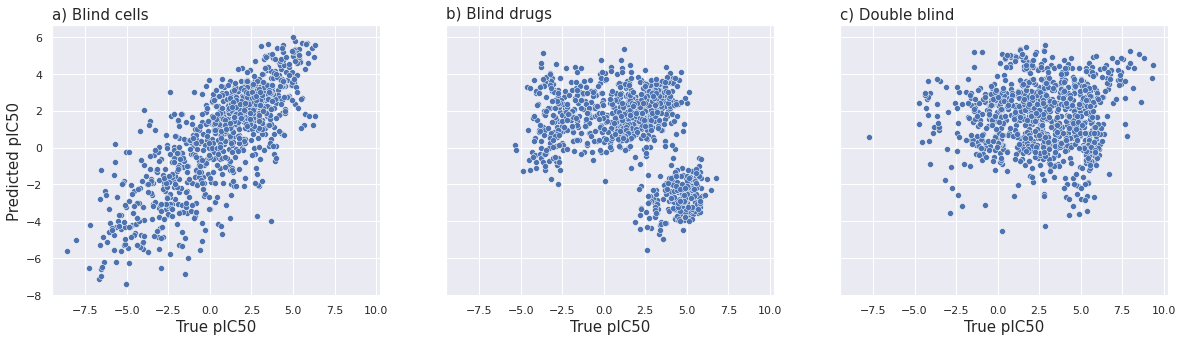

In [217]:
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
sns.scatterplot(x=cell_targets[:1000], y=cell_predictions[:1000], ax = axes[0])
sns.scatterplot(x=drug_targets[:1000], y=drug_predictions[:1000], ax = axes[1])
sns.scatterplot(x=blind_targets[:1000], y=blind_predictions[:1000], ax = axes[2])
axes[0].set_title('a) Blind cells', loc='left', fontsize=15)
axes[1].set_title('b) Blind drugs', loc='left', fontsize=15)
axes[2].set_title('c) Double blind', loc='left', fontsize=15)
for ax in axes:
    ax.set_xlabel('True pIC50', fontsize=15)
    ax.set_ylabel('Predicted pIC50', fontsize=15)
fig.savefig('/home/dionizije/jane/CCL-multimodal-attention/figures/scatter_plots.jpeg', bbox_inches='tight')